In [1]:
from neural_network import NeuralNetwork
from neural_network_utility import evaluate
from math_functions.function_enums import LossFunction, ActivationFunction, Metrics
from dataset_reader import read_monk, read_cup, read_old_cup
from validation import kfold_cv, holdout, kfold_cv_ensemble
from grid import grid_search, get_top_n_results, get_all_results
from sklearn.utils import shuffle
from utils import count_configs, save_top_plots, get_list_models, plot_over_epochs
from ensemble import Ensemble
import numpy as np
import json

### Monks-1

In [23]:
train_data, train_targets = read_monk('datasets/monks/monks-1.train')
test_data, test_targets = read_monk('datasets/monks/monks-1.test')
train_data, train_targets = shuffle(train_data, train_targets)

In [26]:
net = NeuralNetwork(
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    weight_init_uniform_range=0.1,
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.05,
    reg_lambda=0,
    mom_alpha=0.9,
    nesterov=False,
    epochs=300, 
    batch_size=1, 
    classification=True, 
    early_stopping=False,
    fast_stopping=False, 
    linear_decay=False,
    patience=30, 
    tolerance=0.1,
    tao=300, 
    verbose=False
    )

net.train_net(train_data=train_data, train_target=train_targets, val_data=test_data, val_target=test_targets)

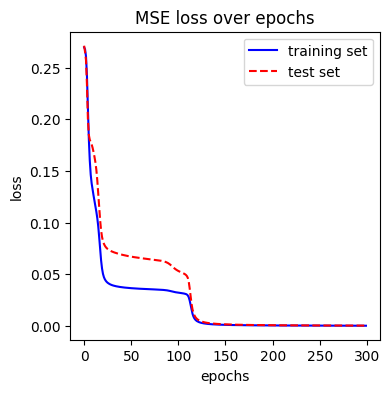

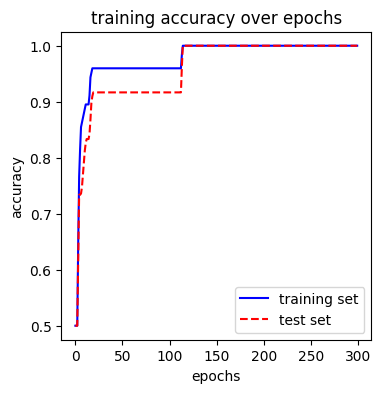

In [27]:
plot_over_epochs(y_values=net.training_losses, title='MSE loss over epochs', y_label='loss', y_legend='training set', y_prime_values=net.validation_losses, y_prime_legend='test set')
plot_over_epochs(y_values=net.training_evaluations, title='training accuracy over epochs', y_label='accuracy', y_legend='training set', y_prime_values=net.validation_evaluations, y_prime_legend='test set')

In [28]:


test_accuracy = net.predict_and_evaluate(test_data, test_targets, Metrics.ACCURACY.value)
test_mse = net.predict_and_evaluate(test_data, test_targets, Metrics.MSE.value)
test_mee = net.predict_and_evaluate(test_data, test_targets, Metrics.MEE.value)
print("TEST RESULTS:")
print(f"Accuracy: {test_accuracy} \nMSE: {test_mse} \nMEE: {test_mee}")
print("------------------")
print("TRAINING RESULTS:")
print(f"Accuracy: {net.training_evaluations[-1]} \nMSE: {net.training_losses[-1]}")



TEST RESULTS:
Accuracy: 1.0 
MSE: 0.00036828674377090294 
MEE: 0.01579574491630774
------------------
TRAINING RESULTS:
Accuracy: 1.0 
MSE: 0.0002585492846445193


### Monks-2

In [33]:
train_data, train_targets = read_monk('datasets/monks/monks-2.train')
test_data, test_targets = read_monk('datasets/monks/monks-2.test')
train_data, train_targets = shuffle(train_data, train_targets)


In [34]:
net = NeuralNetwork(
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value,
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.2,
    reg_lambda=0,
    mom_alpha=0.9,
    epochs=300, 
    batch_size=1, 
    classification=True, 
    early_stopping=False, 
    fast_stopping=False,
    linear_decay=False,
    patience=20, 
    tolerance=0.0001,
    tao=300, 
    verbose=False
    )

net.train_net(train_data=train_data, train_target=train_targets, val_data=test_data, val_target=test_targets)

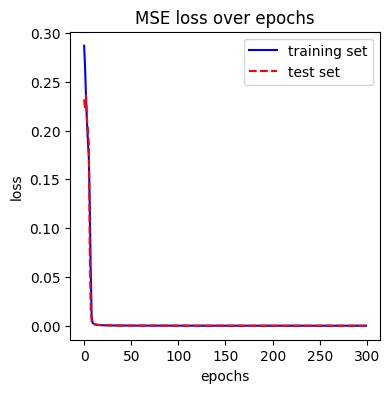

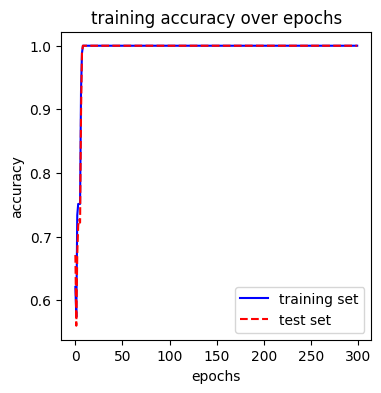

In [35]:
plot_over_epochs(y_values=net.training_losses, title='MSE loss over epochs', y_label='loss', y_legend='training set', y_prime_values=net.validation_losses, y_prime_legend='test set')
plot_over_epochs(y_values=net.training_evaluations, title='training accuracy over epochs', y_label='accuracy', y_legend='training set', y_prime_values=net.validation_evaluations, y_prime_legend='test set')

In [36]:


test_accuracy = net.predict_and_evaluate(test_data, test_targets, Metrics.ACCURACY.value)
test_mse = net.predict_and_evaluate(test_data, test_targets, Metrics.MSE.value)
test_mee = net.predict_and_evaluate(test_data, test_targets, Metrics.MEE.value)
print("TEST RESULTS:")
print(f"Accuracy: {test_accuracy} \nMSE: {test_mse} \nMEE: {test_mee}")
print("------------------")
print("TRAINING RESULTS:")
print(f"Accuracy: {net.training_evaluations[-1]} \nMSE: {net.training_losses[-1]}")



TEST RESULTS:
Accuracy: 1.0 
MSE: 2.327321462513597e-05 
MEE: 0.004564436828747722
------------------
TRAINING RESULTS:
Accuracy: 1.0 
MSE: 2.0847167628940333e-05


### Monks-3

In [38]:
train_data, train_targets = read_monk('datasets/monks/monks-3.train')
test_data, test_targets = read_monk('datasets/monks/monks-3.test')
train_data, train_targets = shuffle(train_data, train_targets)

#train_data, val_data, train_targets, val_targets = holdout(data=train_data, target=train_targets, holdout_percentage=0.8, shuffle_set=True)

In [46]:
net = NeuralNetwork(
    hidden_layer_sizes=[3], 
    n_output_units=1, 
    training_loss_type_value=LossFunction.MSE.value, 
    validation_loss_type_value=LossFunction.MSE.value, 
    evaluation_metric_type_value=Metrics.ACCURACY.value,
    activation_hidden_type_value=ActivationFunction.SIGMOID.value, 
    activation_output_type_value=ActivationFunction.SIGMOID.value, 
    learning_rate=0.008, 
    reg_lambda=0.008,
    mom_alpha=0.9,
    nesterov=False,
    epochs=300, 
    batch_size=1, 
    classification=True, 
    early_stopping=False,
    fast_stopping=False, 
    linear_decay=False,
    patience=30, 
    tolerance=0.001, 
    tao=300,
    verbose=False
    )
net.train_net(train_data=train_data, train_target=train_targets, val_data=test_data, val_target=test_targets)

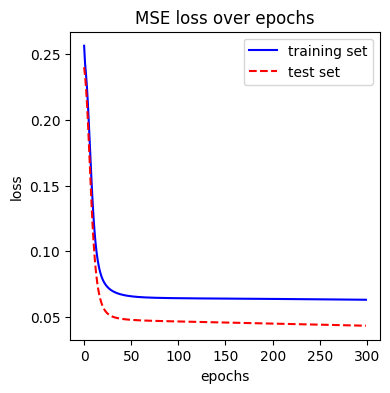

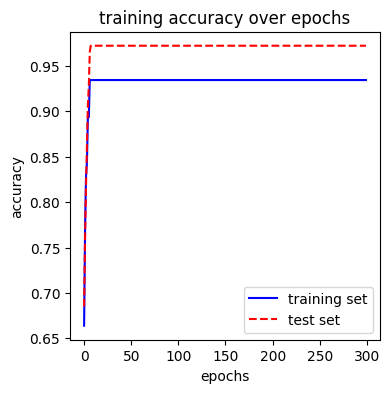

In [47]:
plot_over_epochs(y_values=net.training_losses, title='MSE loss over epochs', y_label='loss', y_legend='training set', y_prime_values=net.validation_losses, y_prime_legend='test set')
plot_over_epochs(y_values=net.training_evaluations, title='training accuracy over epochs', y_label='accuracy', y_legend='training set', y_prime_values=net.validation_evaluations, y_prime_legend='test set')

In [48]:


test_accuracy = net.predict_and_evaluate(test_data, test_targets, Metrics.ACCURACY.value)
test_mse = net.predict_and_evaluate(test_data, test_targets, Metrics.MSE.value)
test_mee = net.predict_and_evaluate(test_data, test_targets, Metrics.MEE.value)
print("TEST RESULTS:")
print(f"Accuracy: {test_accuracy} \nMSE: {test_mse} \nMEE: {test_mee}")
print("------------------")
print("TRAINING RESULTS:")
print(f"Accuracy: {net.training_evaluations[-1]} \nMSE: {net.training_losses[-1]}")



TEST RESULTS:
Accuracy: 0.9722222222222222 
MSE: 0.043388774965763335 
MEE: 0.16393215167103445
------------------
TRAINING RESULTS:
Accuracy: 0.9344262295081968 
MSE: 0.06314212175208439
